In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

# 1. Загрузить файл hr.csv

In [56]:
data=pd.read_csv("HR.csv") 
data.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [6]:
def stat_dataframe (data, name_group, name_stat):
    try:
        data_inside = data [[name_group,name_stat]]
    except:
        end = print('Неправильный тип данных или имя колонки')
        return end
    return data_inside.groupby(name_group).describe()    

**В рамках подготовки к 10-му пункту диплома рассмотрим стат данные более подробно,  
с особенным вниманием на признак 'left'. Если у нас есть несколько классов каждого признака,  
то среднее значение от 'left' по данному классу будет давать нам основу для построения гипотез**

In [7]:
for feature in data[['satisfaction_level','number_project','time_spend_company','Work_accident','promotion_last_5years','salary','sales']]:
    print(stat_dataframe (data, feature, 'left'))


                     left                                             
                    count      mean       std  min  25%  50%  75%  max
satisfaction_level                                                    
0.09                195.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
0.10                358.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
0.11                335.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
0.12                 30.0  0.133333  0.345746  0.0  0.0  0.0  0.0  1.0
0.13                 54.0  0.055556  0.231212  0.0  0.0  0.0  0.0  1.0
0.14                 73.0  0.136986  0.346212  0.0  0.0  0.0  0.0  1.0
0.15                 76.0  0.039474  0.196013  0.0  0.0  0.0  0.0  1.0
0.16                 79.0  0.012658  0.112509  0.0  0.0  0.0  0.0  1.0
0.17                 72.0  0.069444  0.255992  0.0  0.0  0.0  0.0  1.0
0.18                 63.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
0.19                 74.0  0.081081  0.274823  0.0  0.0  0.0  0.0  1.0
0.20  

**Мы видим**   

1. Люди с низким уровнем удовлетворенности покинули проект в полном составе, с высокой нет, есть еще какие-то "флуктуации"  
в середине ряда их пока не смотрим, но можно предположить, что если мы поймем, что влияет на уровень удовлетворенности, мы поймем одну из причин ухода  
2. Из второго и 6 проектов ушло более половины сотрудников (может быть это полная замена коллектива)  
   из 7-го ушли все - возможно он закрыт, скорее всего это выброс в виде данных по закрытому проекту  
   в дальнейшем лучше его не учитывать или рассматривать отдельно  
3. Люди проработавшие в компании 7 и более лет не уходят оттуда, нет почему-то данных по 9 году, распределение покинувших компанию после отработки 2- 6 лет,  
   в принципе, соответствует общепринятой ситуации, через 3-5 лет люди меняют работу  
4. Работники пережившие проишествие на работе увольняются в среднем реже  
5. Люди получившие повышение в течении последних пяти лет (таких немного) увольняются значительно реже  
6. Люди с высокой зарплатой увольняются реже (это не удивительно)  
7. Наибольшее увольнение в среднем в бухгалтерии, кадровом и техническом (у них даже третий квартиль равен 1).  
   Наименьшие у управленцев и R&D-ов. 

**Все вышесказанное повод для выстраивания гипотез**    

**Мода для столбцов с объектами типа "object"**

In [8]:
data.select_dtypes(include = 'object').mode()

sales salary
0  sales    low

# 3. Рассчитать и визуализировать корреляционную матрицу для переменных

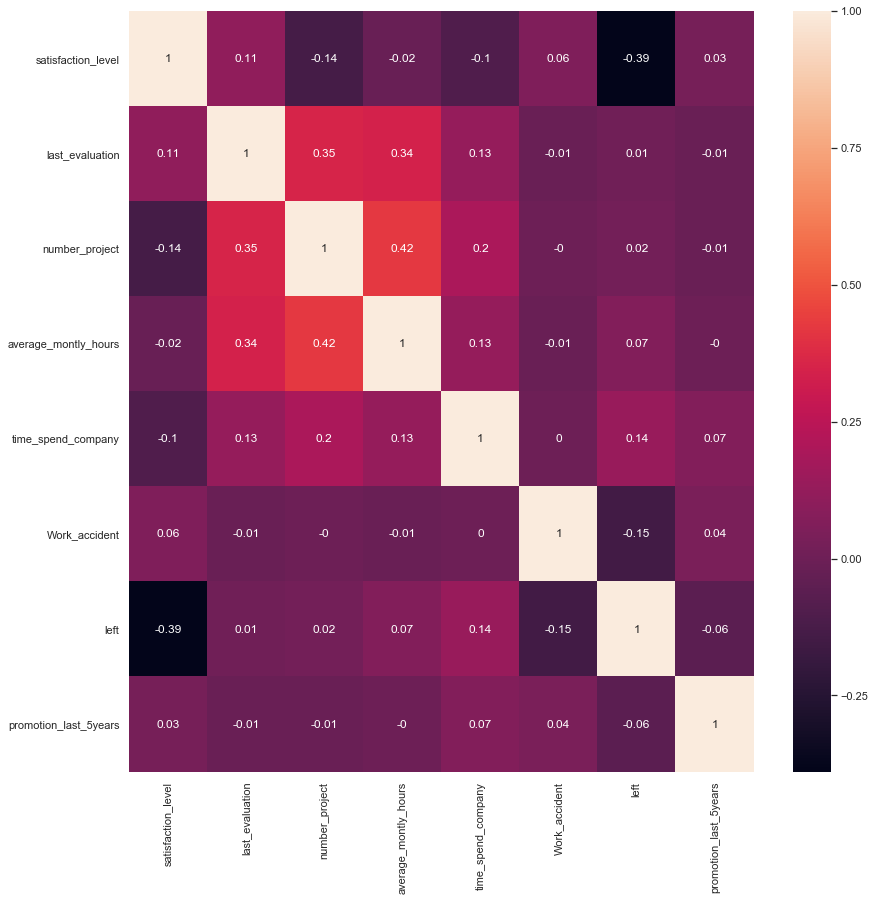

In [9]:
sns.set(rc={'figure.figsize':(14,14)})
correlation_matrix = data.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Здесь выделим два момента**

Первое: значимая корреляция наблюдается между: 
- среднее отработанное время в месяц с последней оценкой;  
- среднее отработанное время в месяц c номером проекта;
- количество покинувших компанию и уровень удовлетворенности.
Скорее всего отработанные часы влияют на оценку и в некоторых проектах работают больше (не исключено правда, что это количество проектов в которых учавствует сотрудник  
тогда все еще проще).  

Второе, многие данные носят ранговый характер, "left" даже дихотомический, уместно посмотреть корреляцию Спирмена

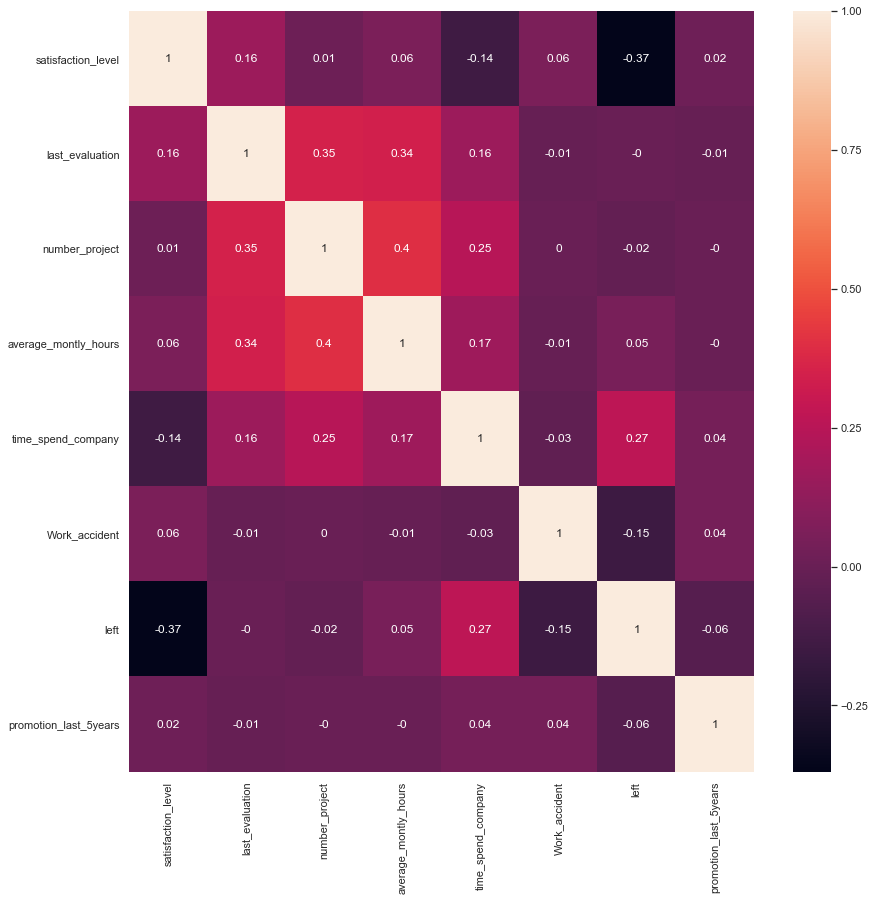

In [10]:
sns.set(rc={'figure.figsize':(14,14)})
correlation_matrix = data.corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Время проведенное в компании коррелирует со многими значениями, главное со столбцом "left"**

**Ну и посмотрим уж по Кендаллу, т.к. мы не очищали данные от выбросов (Кендалл в этом случае предпочтительней**

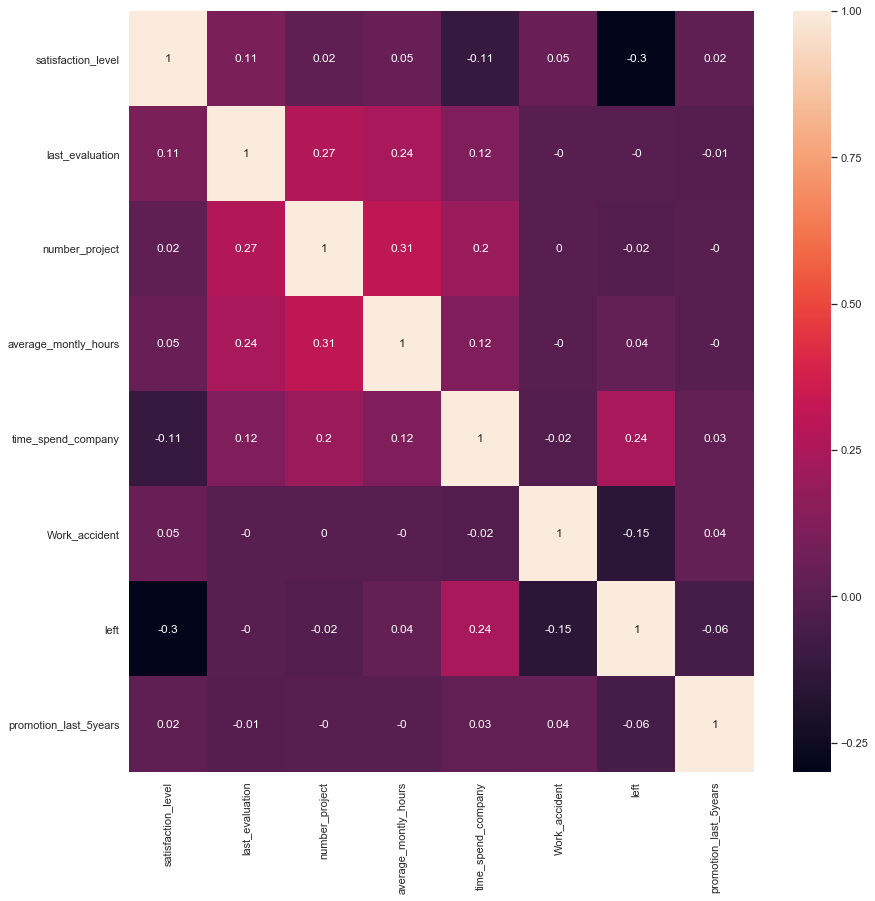

In [11]:
sns.set(rc={'figure.figsize':(14,14)})
correlation_matrix = data.corr(method ='kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Все коэффициенты несколько придавило, как и учит теория**

**У нас есть категориальные данные "sales" и "salary" переведем их в ранговый вид**

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
data['sales_for_count'] = le.fit_transform(data['sales'])

In [60]:
data['salary_for_count'] = data['salary'].map({'low': 0, 'medium': 1, 'high': 2})

In [15]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  sales_for_count  salary_for_count  
0     low                7                 0  
1  medium                7                 1  
2  medium                7                 1  
3     low                7                 0  
4     low                7                 0

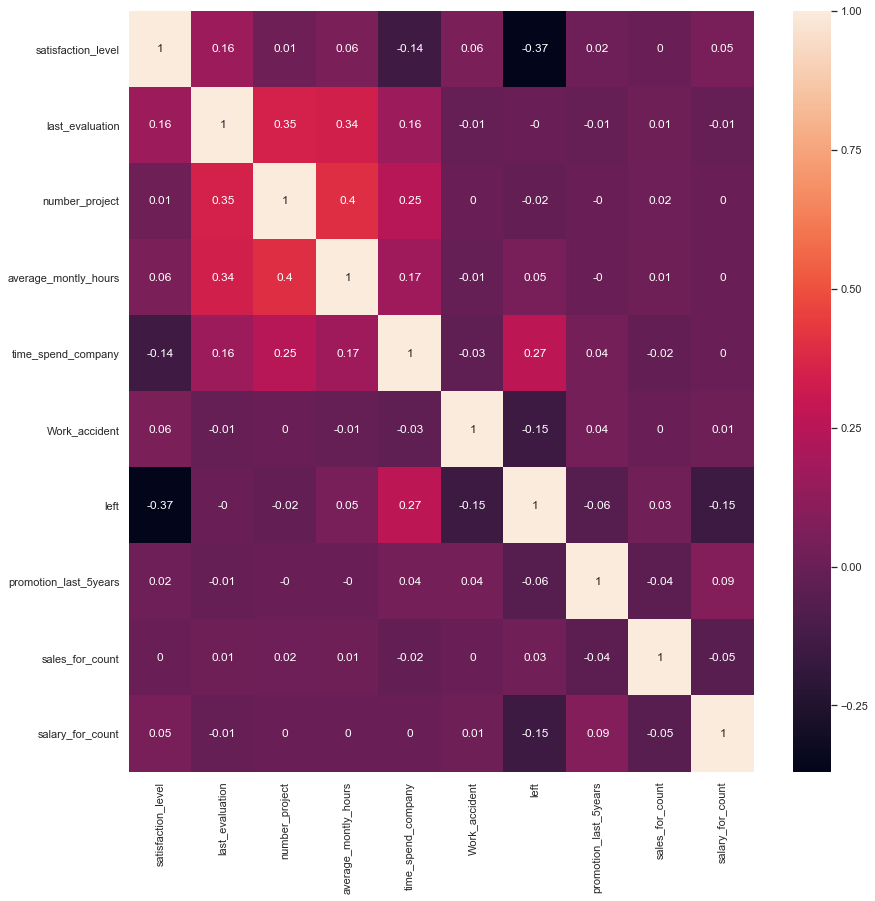

In [16]:
sns.set(rc={'figure.figsize':(14,14)})
correlation_matrix = data.corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

**Расчета коэффициента корреляции с дихотомическими данными 0,1 используют бисериальный коэффициент**

In [17]:
stats.pointbiserialr(data['left'], data['sales_for_count'])

PointbiserialrResult(correlation=0.032105293633678686, pvalue=8.402000854875094e-05)

In [18]:
feature = 'sales_for_count'
corr, pv = stats.pointbiserialr(data['left'], data[feature])

oh, sales
oh, salary


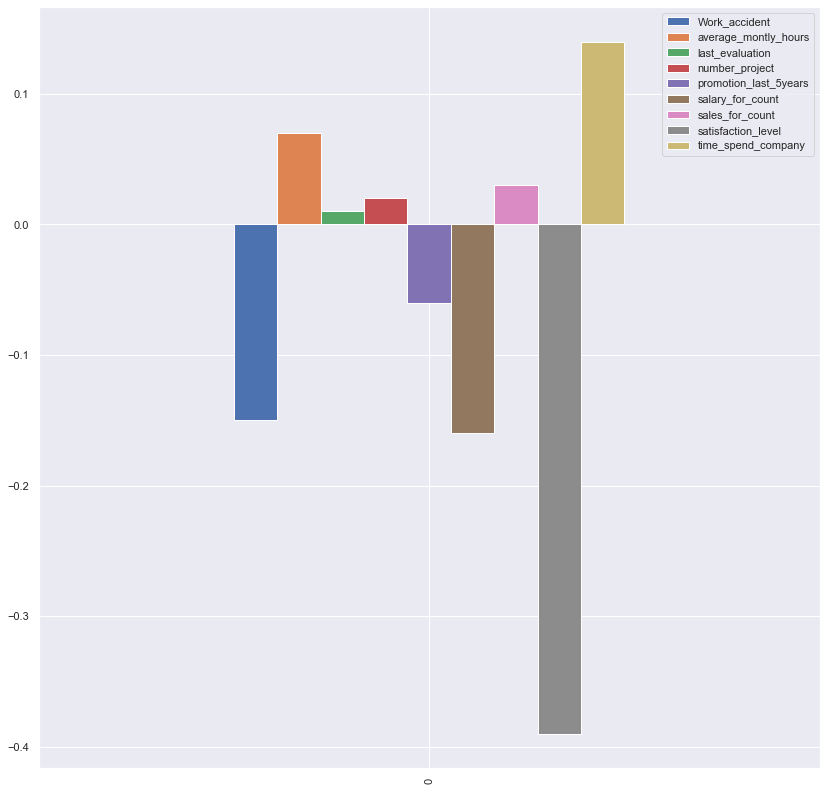

In [19]:
corr_line = {}
for feature in data:
        try:
            corr, pv = stats.pointbiserialr(data['left'], data[feature])
            corr_line[feature] = corr.round(2)
        except:
            print('oh,',feature)
del corr_line['left']
corr_line = pd.DataFrame([corr_line])
corr_line.plot.bar()
plt.show()

**Печально результаты получились как у Пирсона (это написано в мануале SciPy, просто хотелось проверить)**

# 4. Визуализировать несколько взаимосвязей между переменными

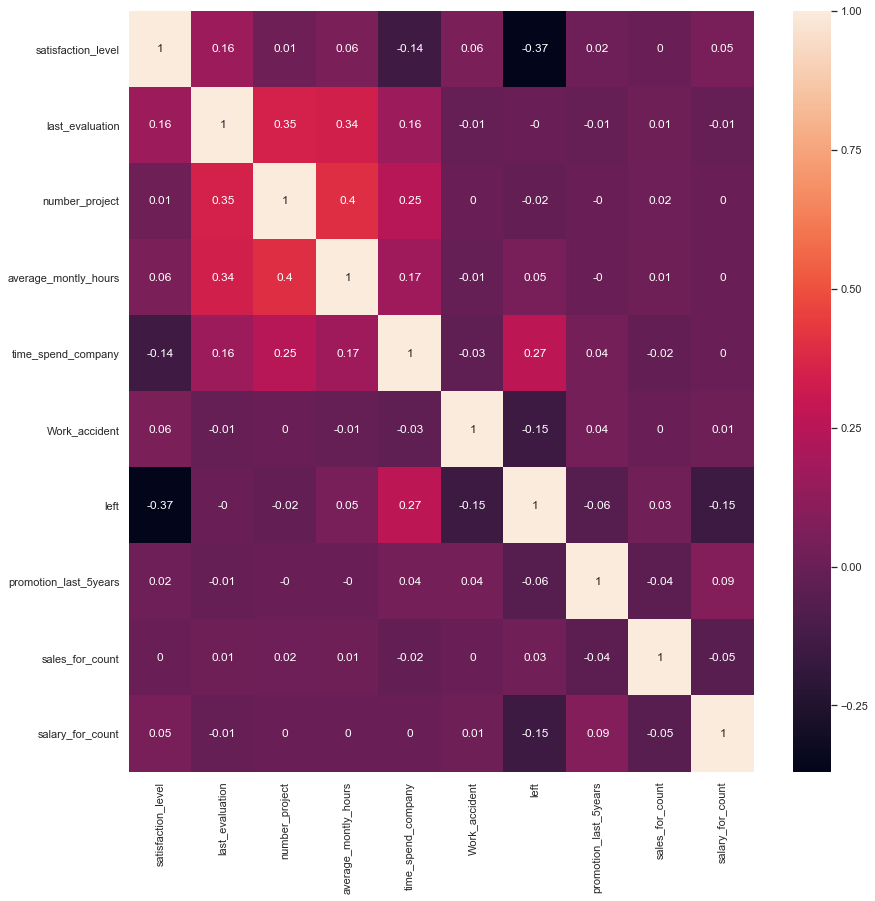

In [20]:
sns.set(rc={'figure.figsize':(14,14)})
correlation_line = data.corr(method ='kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [21]:
sns.pairplot(data, height = 10)
plt.show()

**Заметить закономерности сложно, поищем разваливаются ли сплошные области на какие-нибудь классы.**

In [22]:
data_short = data[['satisfaction_level','last_evaluation','average_montly_hours','sales','salary','left']]
data_short.head()

satisfaction_level  last_evaluation  average_montly_hours  sales  salary  \
0                0.38             0.53                   157  sales     low   
1                0.80             0.86                   262  sales  medium   
2                0.11             0.88                   272  sales  medium   
3                0.72             0.87                   223  sales     low   
4                0.37             0.52                   159  sales     low   

   left  
0     1  
1     1  
2     1  
3     1  
4     1

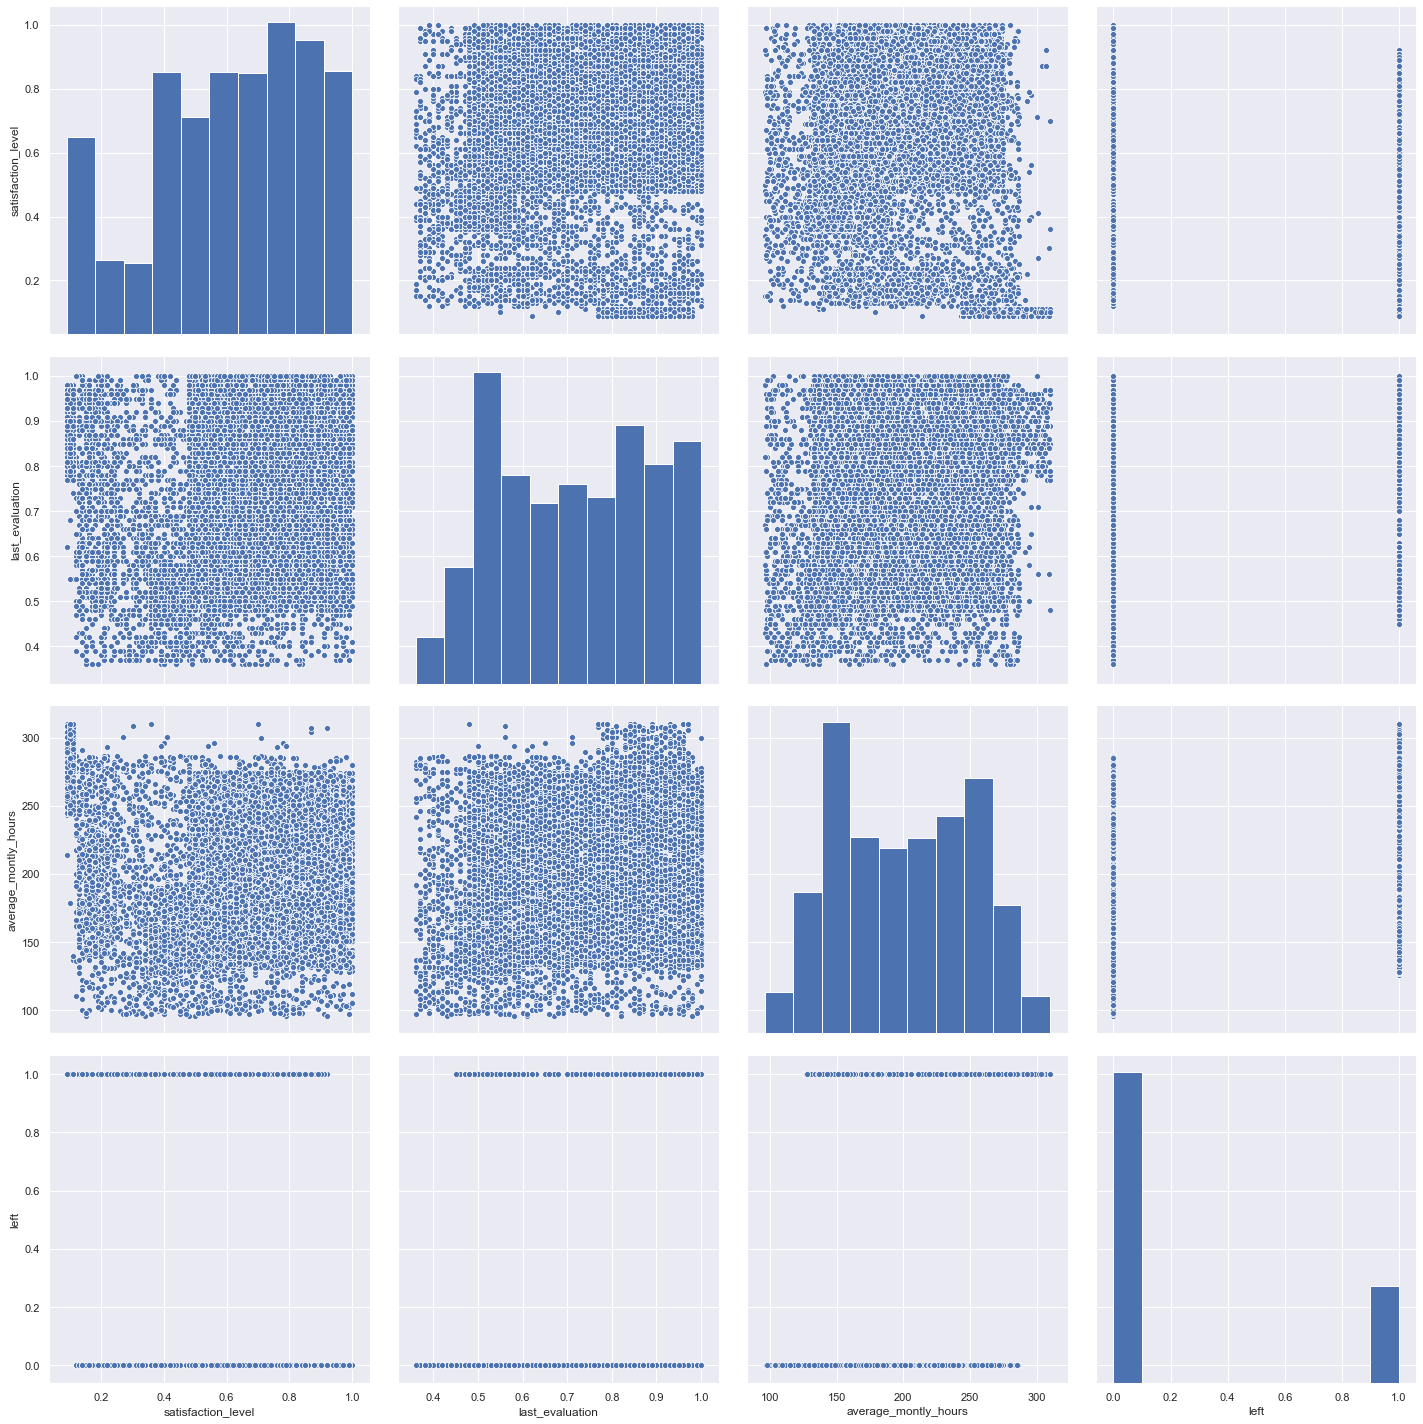

In [23]:
sns.pairplot(data_short, height = 5)
plt.show()

**Ищем классы по отделам**

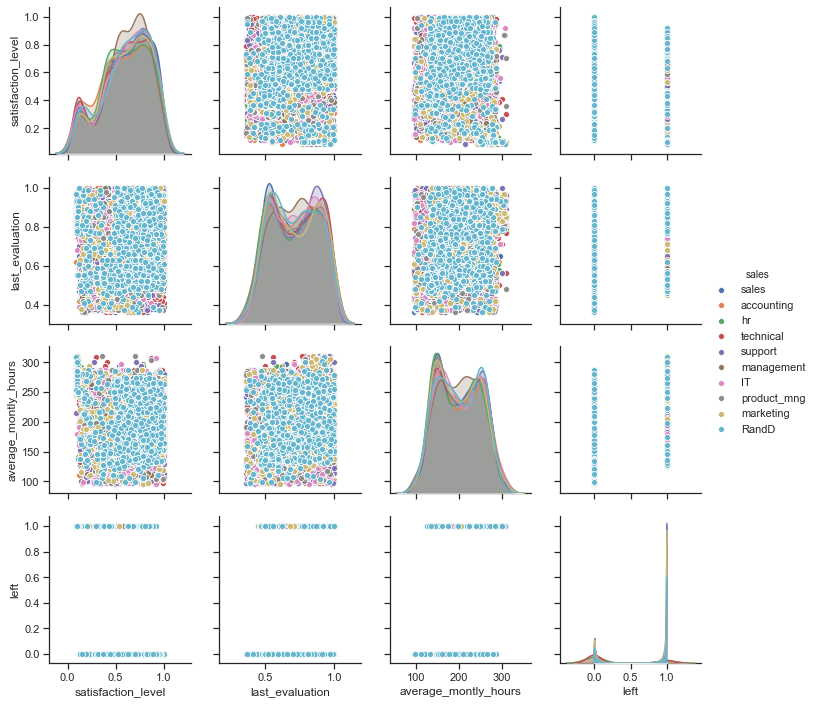

In [24]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_short, hue='sales')
plt.show()

**Наслоение данных. Попробуем сделать графики по каждому классу**

In [25]:
sales_name = data_short['sales'].unique()
sales_name

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

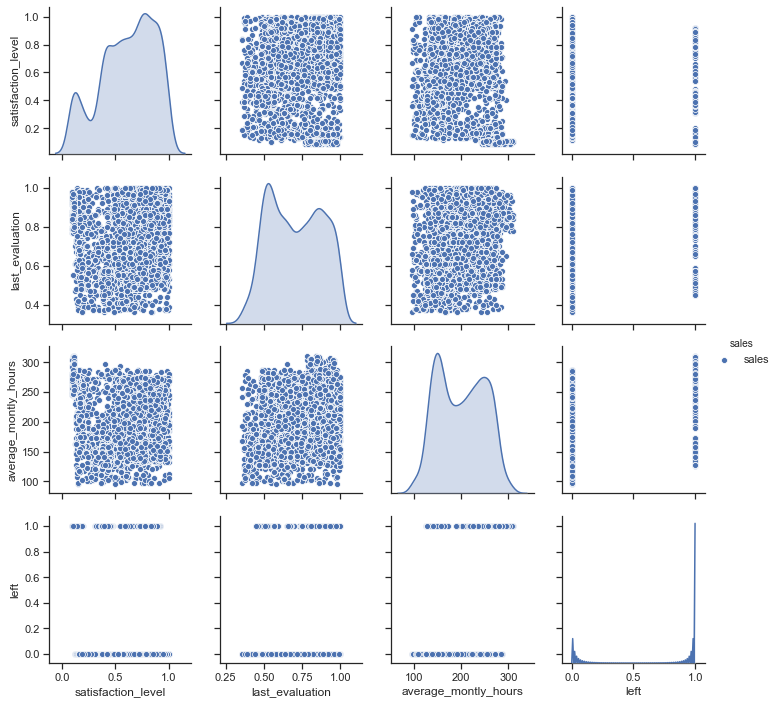

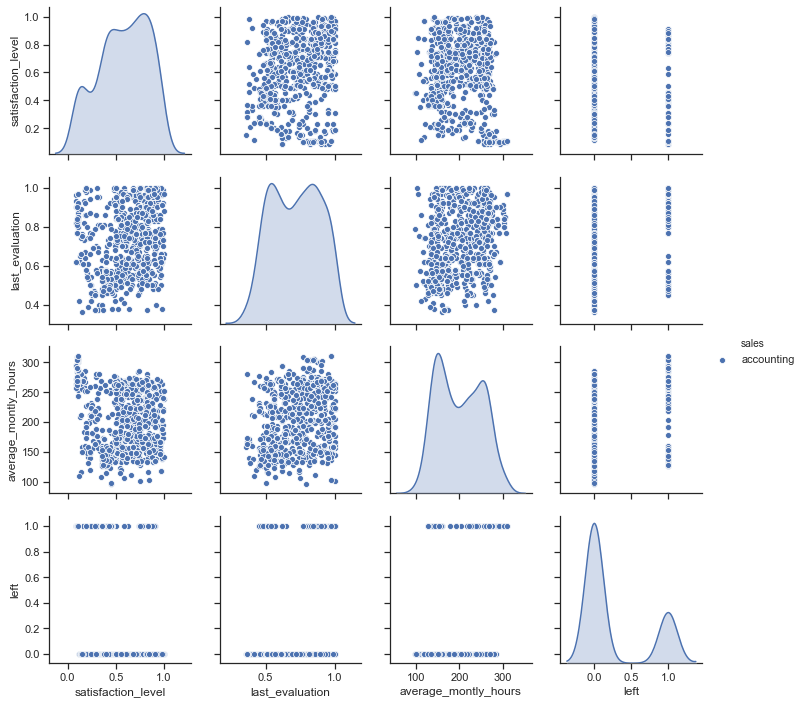

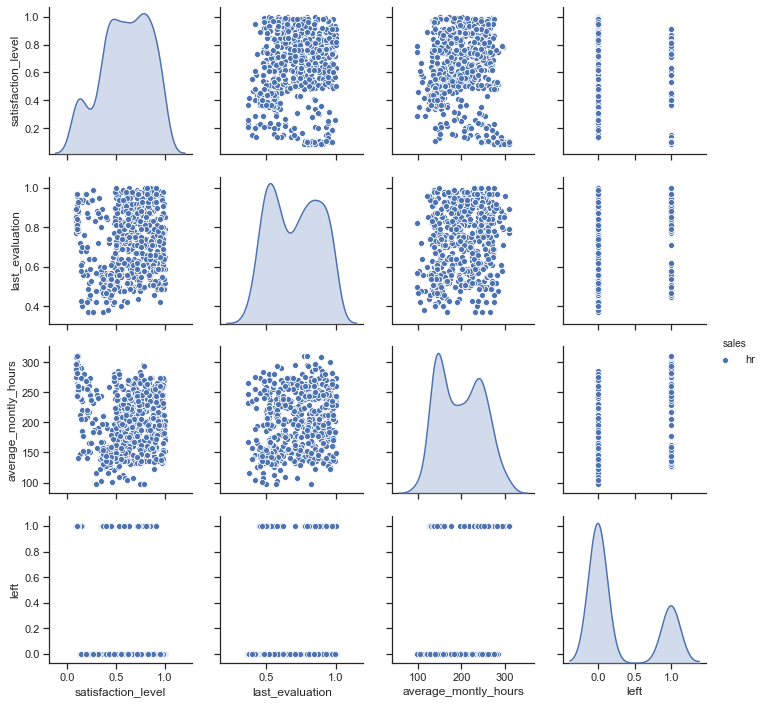

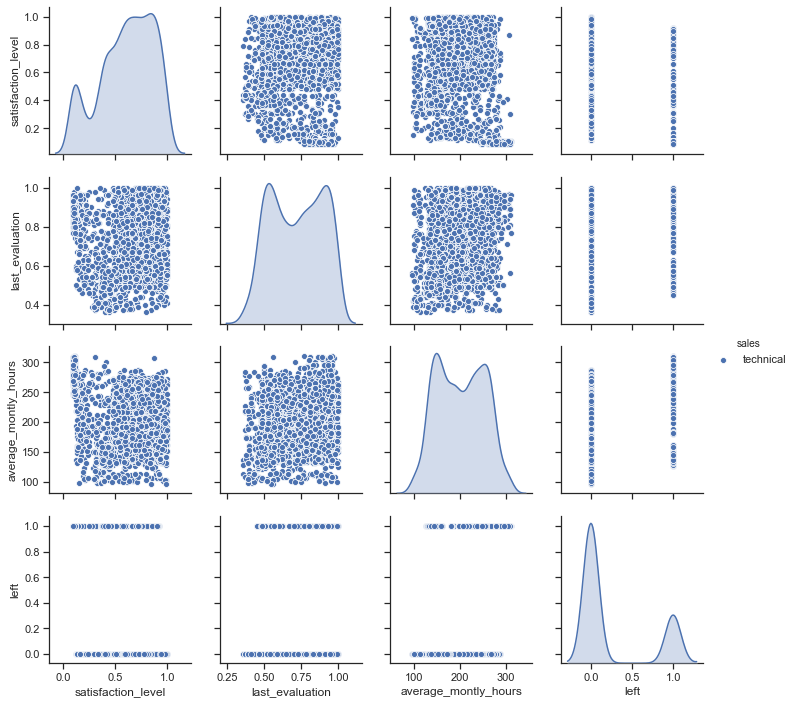

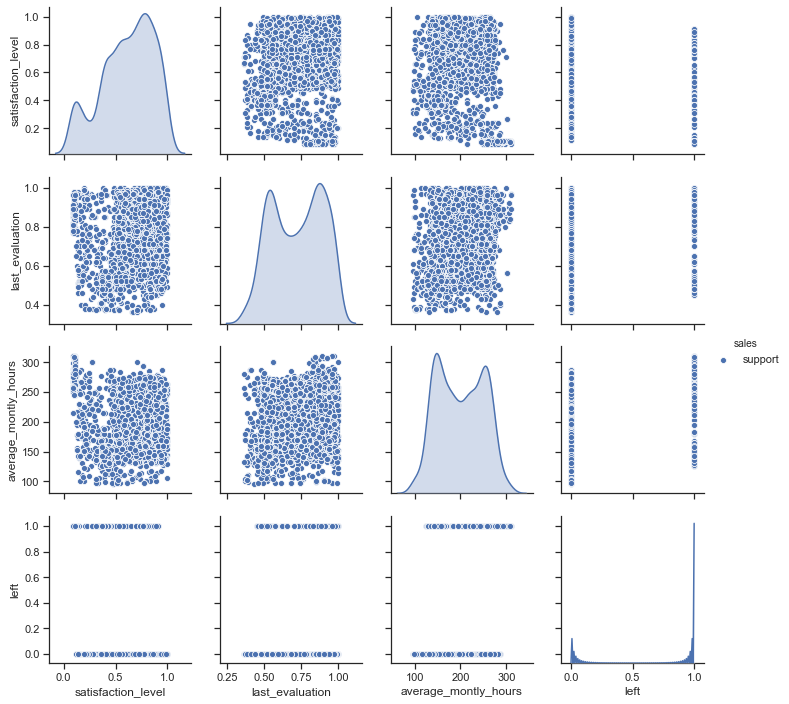

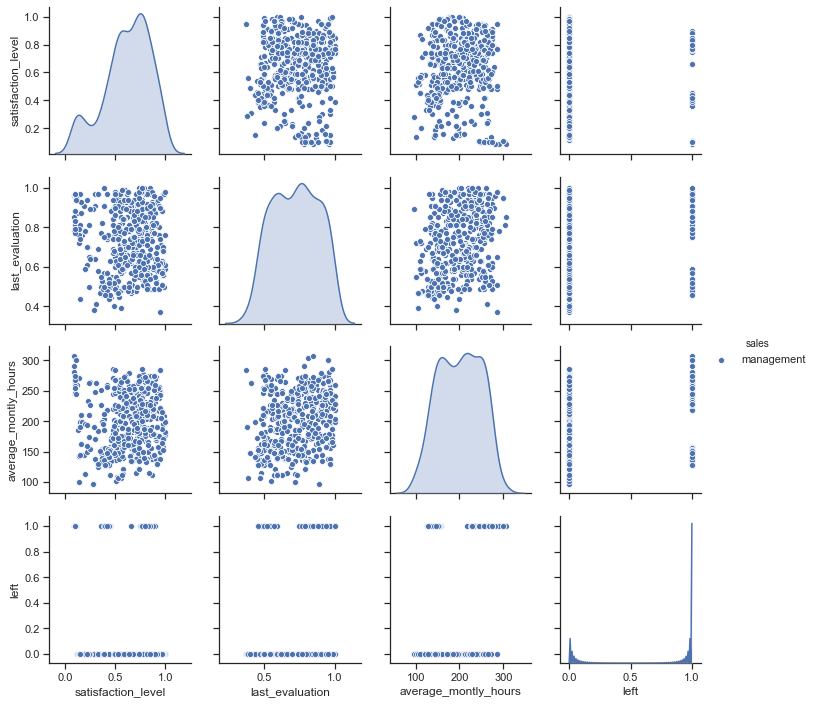

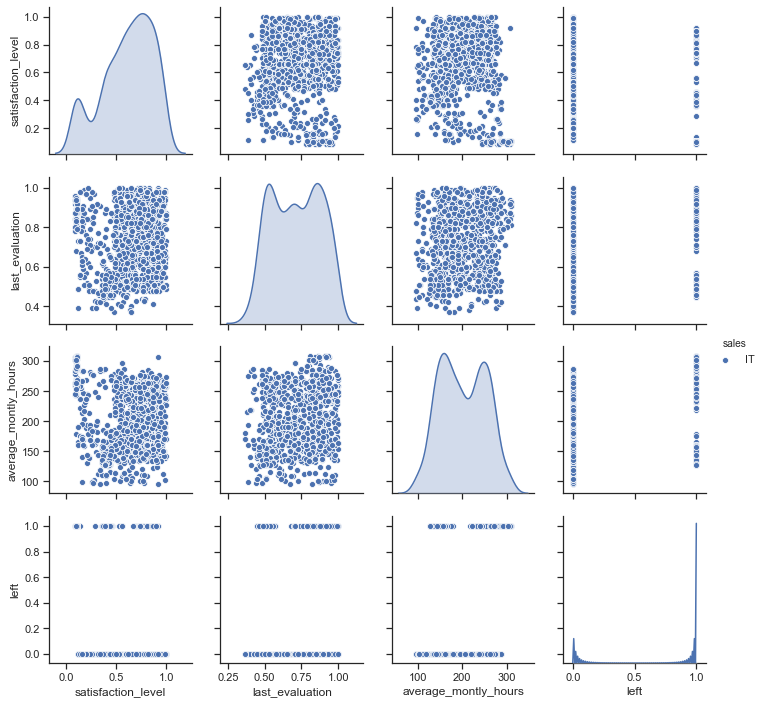

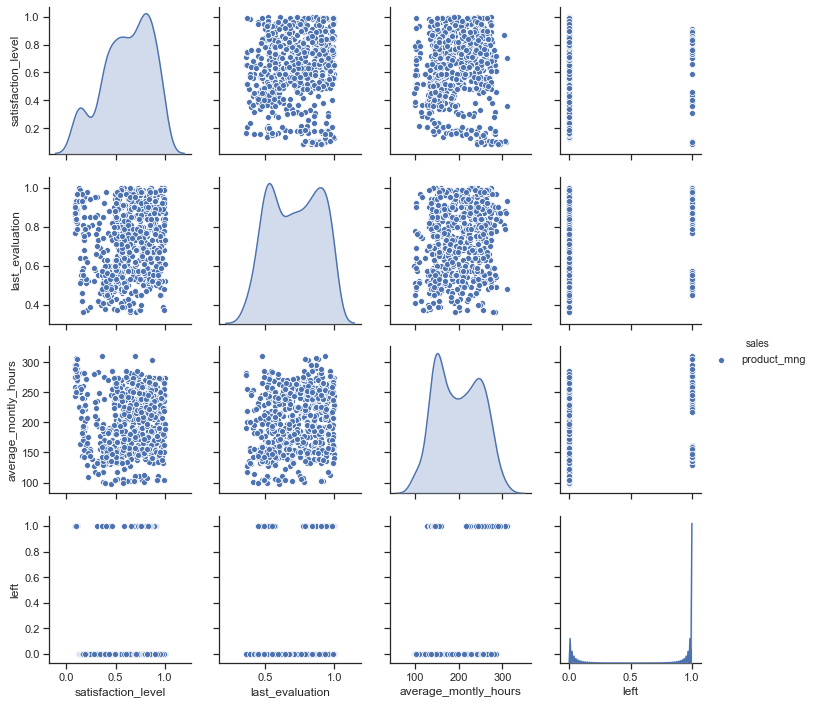

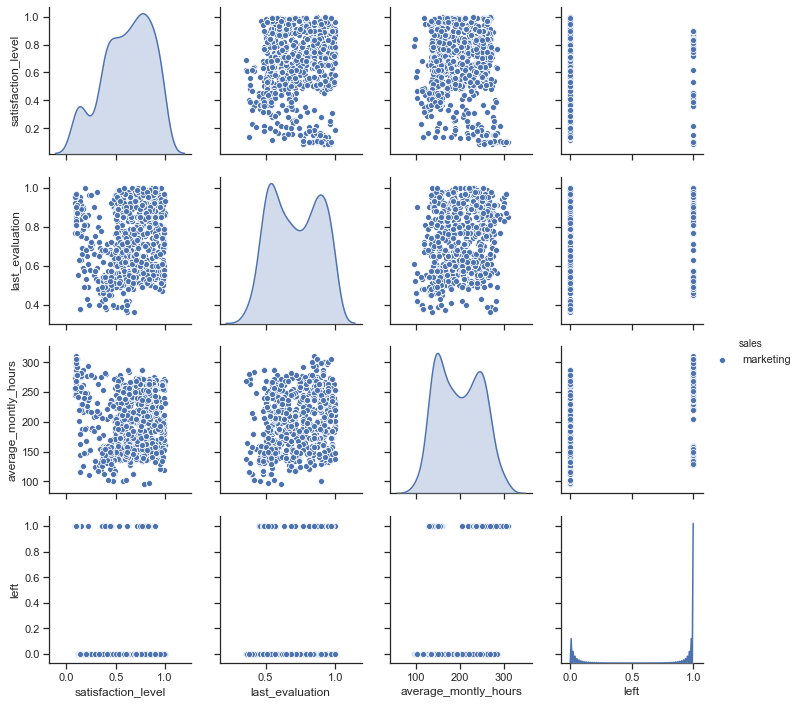

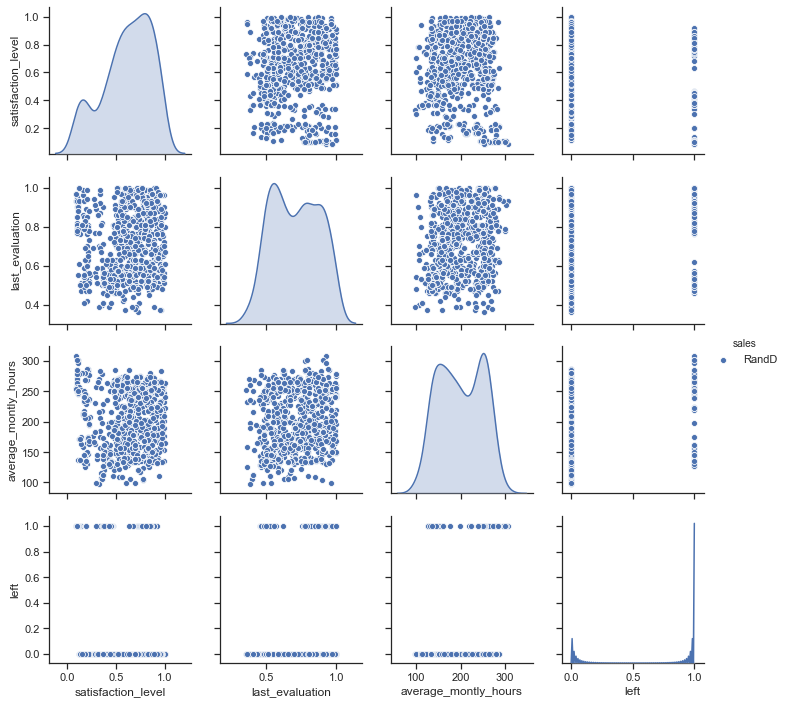

In [26]:
for sales in sales_name: 
    sns.set(style="ticks", color_codes=True)
    fig = sns.pairplot(data = data_short[data_short['sales'] == sales], hue='sales')
    plt.show()

**Чего то четко выраженного не наблюдается. Проделаем то же по зарплате**

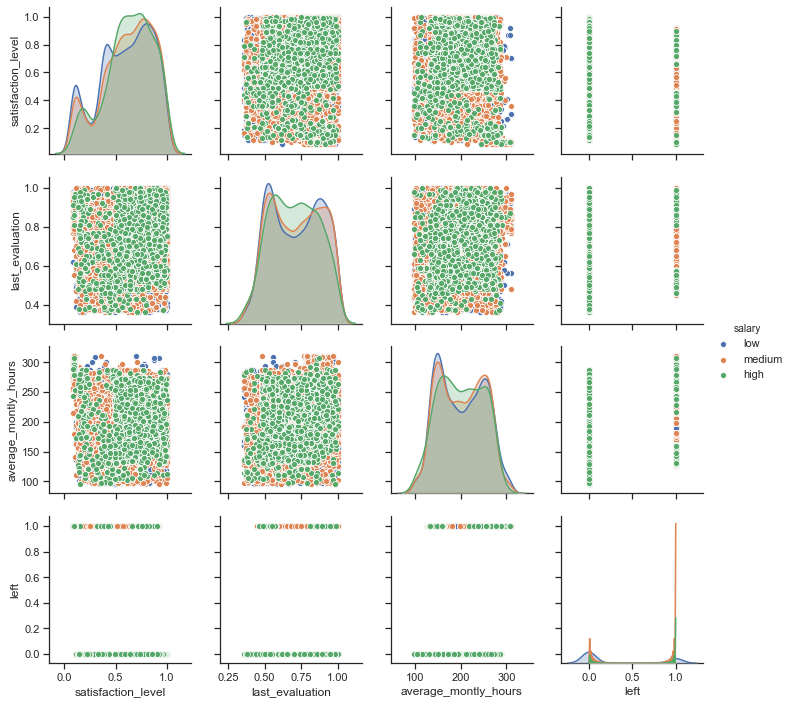

In [27]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_short, hue='salary')
plt.show()

In [28]:
name_salary = data_short['salary'].unique()
name_salary

array(['low', 'medium', 'high'], dtype=object)

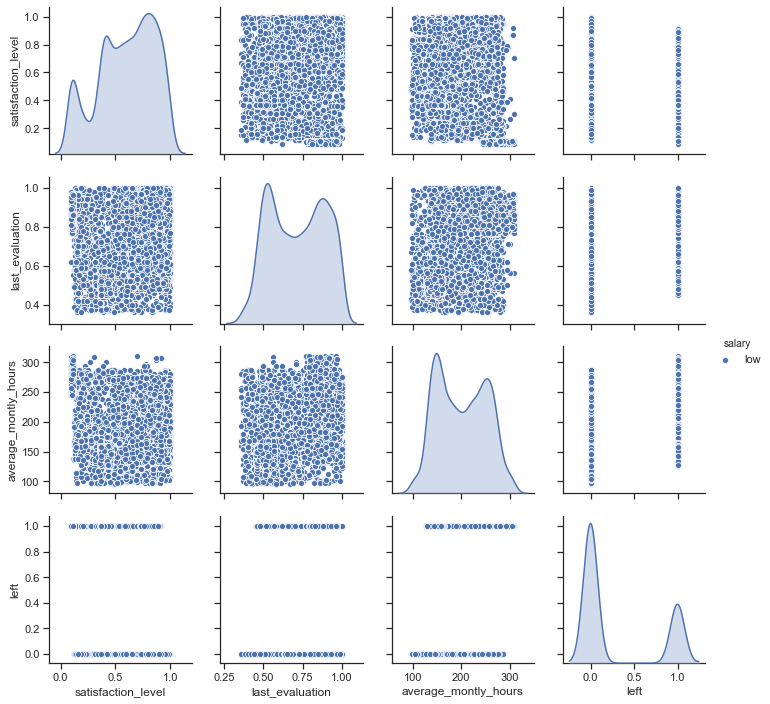

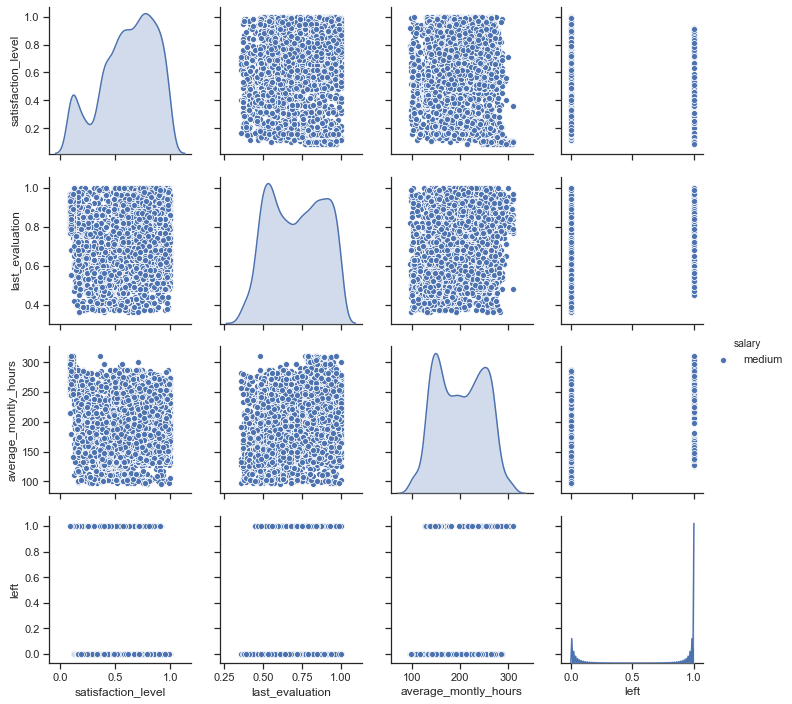

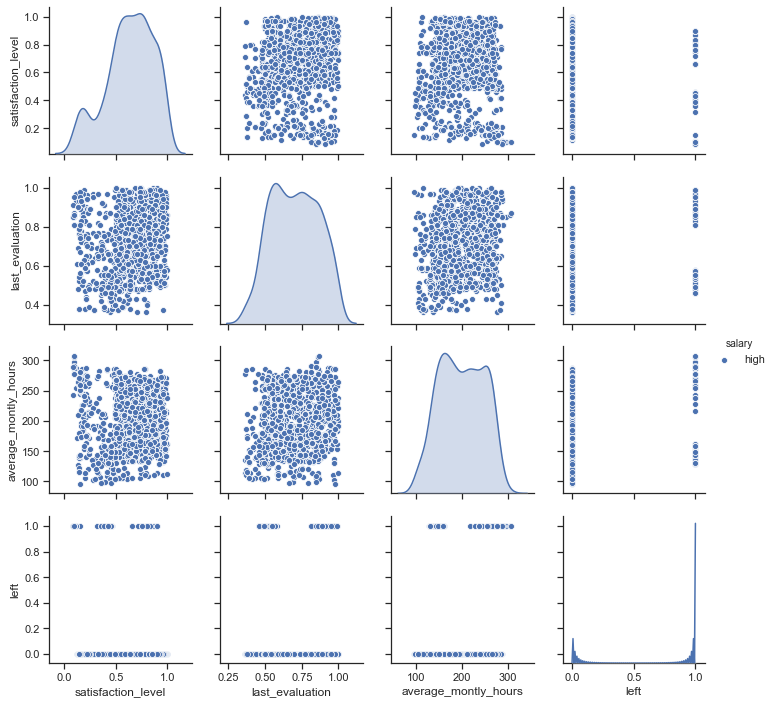

In [29]:
for salary in name_salary:
    sns.set(style="ticks", color_codes=True)
    fig = sns.pairplot(data = data_short[data_short['salary'] == salary], hue='salary')
    plt.show()

**По увольнениям**

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


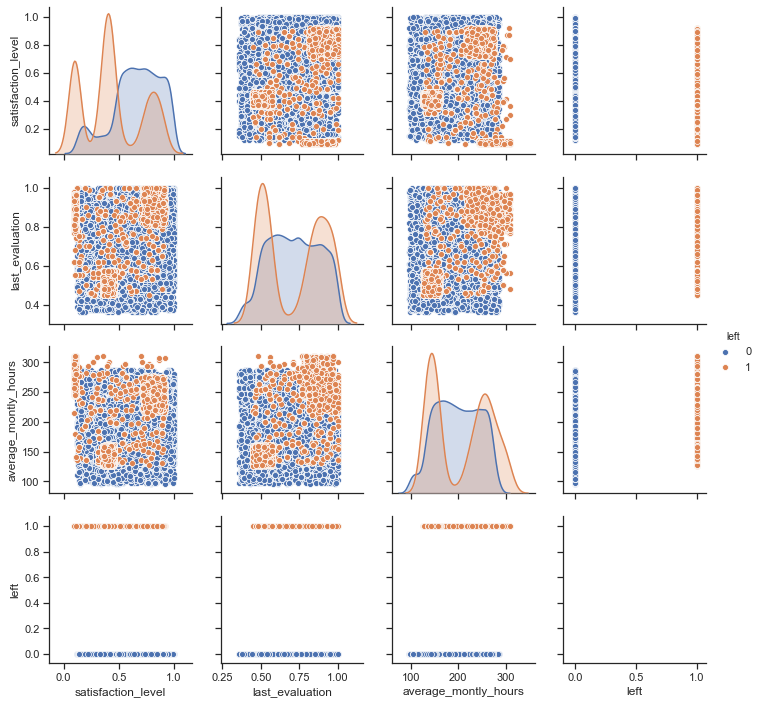

In [30]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_short, hue='left')
plt.show()

In [31]:
name_left = data_short['left'].unique()
name_left

array([1, 0], dtype=int64)

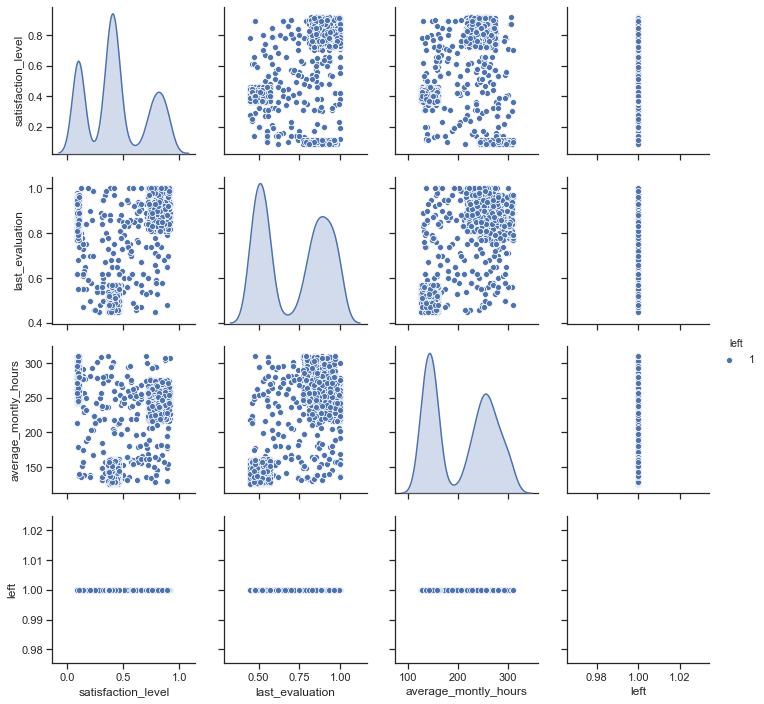

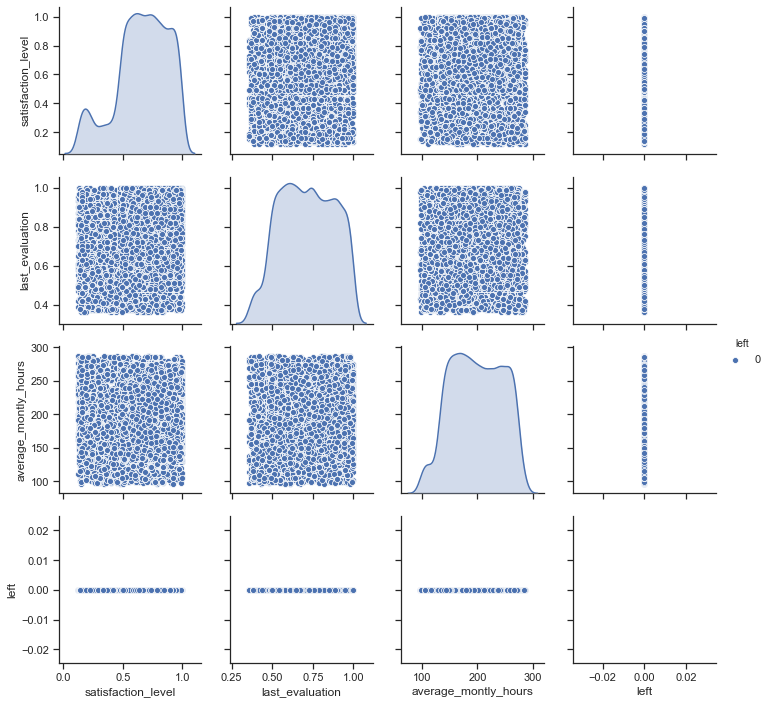

In [32]:
for left in name_left:
    sns.set(style="ticks", color_codes=True)
    fig = sns.pairplot(data = data_short[data_short['left'] == left], hue='left')
    plt.show()

**Здесь вроде бы есть кое какие закономерности и интересности**

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

**По теории, если переменные ранговые, то вместо t-теста следует применять тест Манна-Уитни.  
Применим и то и то и сравним как это работает.**

In [33]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [34]:
left = data['left']
satisfaction_level = data['satisfaction_level']

In [35]:
# Дисперсию не смотрим и так ясно что распределения разные
stats.ttest_ind(left, satisfaction_level, equal_var = False)

Ttest_indResult(statistic=-93.06077566920372, pvalue=0.0)

In [36]:
stats.mannwhitneyu(left, satisfaction_level, alternative = 'less')

MannwhitneyuResult(statistic=53363238.5, pvalue=0.0)

**Статистическая значимость отсутствует**

In [37]:
satisfaction_level = data['satisfaction_level'] 
last_evaluation = data['last_evaluation']
average_montly_hours = data['average_montly_hours']

In [38]:
import statistics

In [39]:
statistics.variance(satisfaction_level), statistics.variance(last_evaluation)

(0.061817200647087636, 0.02929886443156307)

In [40]:
stats.ttest_ind(last_evaluation, satisfaction_level, equal_var = False)

Ttest_indResult(statistic=41.898681540702064, pvalue=0.0)

In [41]:
stats.mannwhitneyu(last_evaluation, satisfaction_level, alternative = 'less')

MannwhitneyuResult(statistic=137217143.0, pvalue=1.0)

**Могу ошибаться, но по моему U критерий Манна-Уитни указывает здесь на сильную статистическую связь а t-тест нет.  
Почему я считаю, что есть взаимосвязь pvalue > 0.05, значение коэффициента больше, чем если бы получилось при подстановке в формулу одинаковых значений.  
Насколько я понимаю, это и есть критерий тесноты связи**

In [42]:
salary_for_count = data['salary_for_count']

In [43]:
stats.mannwhitneyu(left, salary_for_count, alternative = 'less')

MannwhitneyuResult(statistic=79438393.0, pvalue=0.0)

In [44]:
stats.ttest_ind(left, salary_for_count, equal_var = False)

Ttest_indResult(statistic=-56.98617426927456, pvalue=0.0)

**Взаимосвязь отсутствует**

# 6. Рассчитать сколько работников работает в каждом департаменте

**Уволенных убираем**

In [88]:
data_employee = data[data['left'] == 0].groupby('sales').count()
data_employee

satisfaction_level  last_evaluation  number_project  \
sales                                                              
IT                          954              954             954   
RandD                       666              666             666   
accounting                  563              563             563   
hr                          524              524             524   
management                  539              539             539   
marketing                   655              655             655   
product_mng                 704              704             704   
sales                      3126             3126            3126   
support                    1674             1674            1674   
technical                  2023             2023            2023   

             average_montly_hours  time_spend_company  Work_accident  left  \
sales                                                                        
IT                            954                 954            954   954   
RandD                         666                 666            666   666   
accounting                    563                 563            563   563   
hr                            524                 524            524   524   
management                    539                 539            539   539   
marketing                     655                 655            655   655   
product_mng                   704                 704            704   704   
sales                        3126                3126           3126  3126   
support                      1674                1674           1674  1674   
technical                    2023                2023           2023  2023   

             promotion_last_5years  salary  sales_for_count  salary_for_count  
sales                                                                          
IT                             954     954              954               954  
RandD                          666     666              666               666  
accounting                     563     563              563               563  
hr                             524     524              524               524  
management                     539     539              539               539  
marketing                      655     655              655               655  
product_mng                    704     704              704               704  
sales                         3126    3126             3126              3126  
support                       1674    1674             1674              1674  
technical                     2023    2023             2023              2023

# 7. Показать распределение сотрудников по зарплатам

**Как я понимаю уволенных убираем, хотим посмотреть распределение среди тех кто остался**

In [86]:
stat_dataframe (data[data['left'] == 0], 'sales', 'salary_for_count')

salary_for_count                                             
                       count      mean       std  min  25%  50%  75%  max
sales                                                                    
IT                     954.0  0.624738  0.632834  0.0  0.0  1.0  1.0  2.0
RandD                  666.0  0.606607  0.616723  0.0  0.0  1.0  1.0  2.0
accounting             563.0  0.662522  0.685227  0.0  0.0  1.0  1.0  2.0
hr                     524.0  0.610687  0.622368  0.0  0.0  1.0  1.0  2.0
management             539.0  1.191095  0.777611  0.0  1.0  1.0  2.0  2.0
marketing              655.0  0.687023  0.657630  0.0  0.0  1.0  1.0  2.0
product_mng            704.0  0.596591  0.646065  0.0  0.0  1.0  1.0  2.0
sales                 3126.0  0.633077  0.628939  0.0  0.0  1.0  1.0  2.0
support               1674.0  0.627240  0.626854  0.0  0.0  1.0  1.0  2.0
technical             2023.0  0.595650  0.644248  0.0  0.0  1.0  1.0  2.0

In [85]:
stat_dataframe (data[data['left'] == 0], 'sales', 'salary')

salary                     
             count unique     top  freq
sales                                  
IT             954      3  medium   438
RandD          666      3  medium   310
accounting     563      3     low   259
hr             524      3     low   243
management     539      3    high   224
marketing      655      3  medium   308
product_mng    704      3     low   346
sales         3126      3  medium  1469
support       1674      3  medium   784
technical     2023      3     low   994

In [84]:
data_salary_sales = stat_dataframe (data[data['left'] == 0], 'salary', 'sales')
data_salary_sales

sales                    
       count unique    top  freq
salary                          
high    1155     10  sales   255
low     5144     10  sales  1402
medium  5129     10  sales  1469

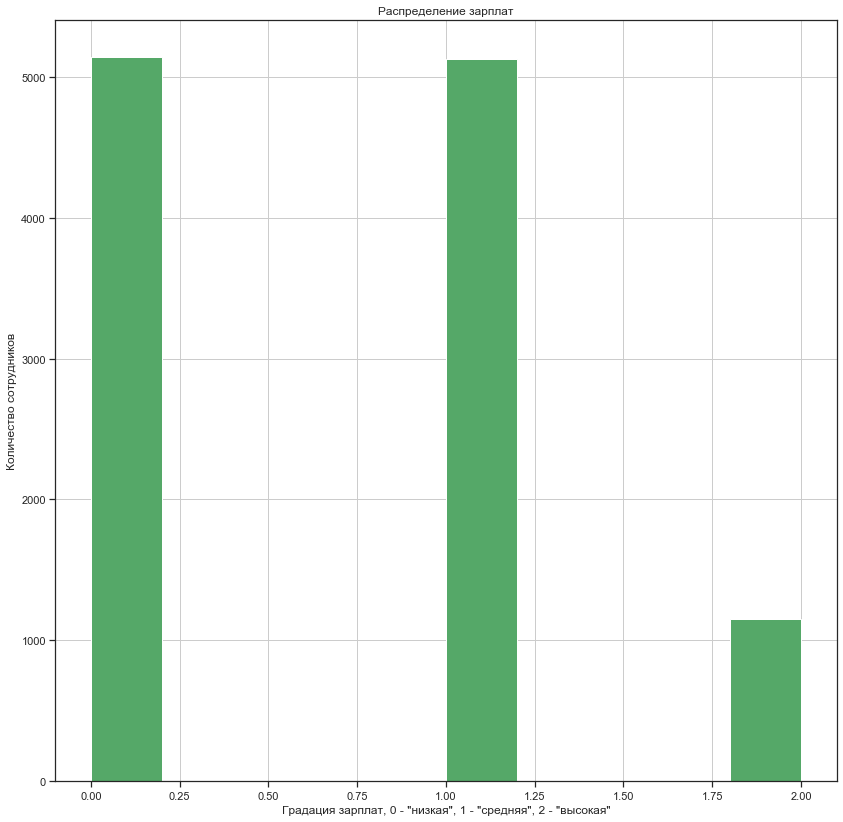

In [83]:
plt.hist(data[data['left'] == 0]['salary_for_count'], facecolor='g')
plt.xlabel('Градация зарплат, 0 - "низкая", 1 - "средняя", 2 - "высокая"')
plt.ylabel('Количество сотрудников')
plt.title('Распределение зарплат')
plt.grid(True)
plt.show()

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [69]:
one = data[data['left'] == 0].set_index('sales')
one.head()

satisfaction_level  last_evaluation  number_project  \
sales                                                        
sales                0.58             0.74               4   
sales                0.82             0.67               2   
sales                0.45             0.69               5   
sales                0.78             0.82               5   
sales                0.49             0.60               3   

       average_montly_hours  time_spend_company  Work_accident  left  \
sales                                                                  
sales                   215                   3              0     0   
sales                   202                   3              0     0   
sales                   193                   3              0     0   
sales                   247                   3              0     0   
sales                   214                   2              0     0   

       promotion_last_5years salary  sales_for_count  salary_for_count  
sales                                                                   
sales                      0    low                7                 0  
sales                      0    low                7                 0  
sales                      0    low                7                 0  
sales                      0    low                7                 0  
sales                      0    low                7                 0

In [81]:
two = one.groupby([one.index, 'salary']).count()
two.head(10)

satisfaction_level  last_evaluation  number_project  \
sales      salary                                                        
IT         high                    79               79              79   
           low                    437              437             437   
           medium                 438              438             438   
RandD      high                    47               47              47   
           low                    309              309             309   
           medium                 310              310             310   
accounting high                    69               69              69   
           low                    259              259             259   
           medium                 235              235             235   
hr         high                    39               39              39   

                   average_montly_hours  time_spend_company  Work_accident  \
sales      salary                                                            
IT         high                      79                  79             79   
           low                      437                 437            437   
           medium                   438                 438            438   
RandD      high                      47                  47             47   
           low                      309                 309            309   
           medium                   310                 310            310   
accounting high                      69                  69             69   
           low                      259                 259            259   
           medium                   235                 235            235   
hr         high                      39                  39             39   

                   left  promotion_last_5years  sales_for_count  \
sales      salary                                                 
IT         high      79                     79               79   
           low      437                    437              437   
           medium   438                    438              438   
RandD      high      47                     47               47   
           low      309                    309              309   
           medium   310                    310              310   
accounting high      69                     69               69   
           low      259                    259              259   
           medium   235                    235              235   
hr         high      39                     39               39   

                   salary_for_count  
sales      salary                    
IT         high                  79  
           low                  437  
           medium               438  
RandD      high                  47  
           low                  309  
           medium               310  
accounting high                  69  
           low                  259  
           medium               235  
hr         high                  39

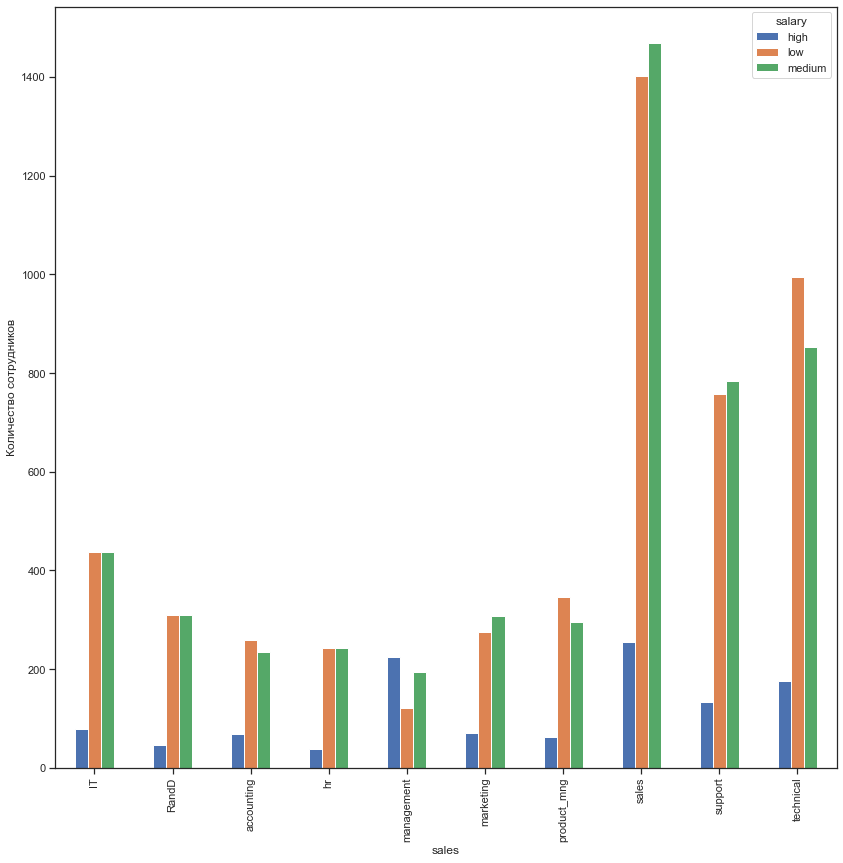

In [87]:
two['sales_for_count'].unstack().plot(kind='bar')
plt.ylabel('Количество сотрудников')
plt.show()

# 9. Сколько сотрудников покинули компанию

In [90]:
data[data['left'] == 1].groupby('left').count()

satisfaction_level  last_evaluation  number_project  \
left                                                        
1                   3571             3571            3571   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
1                     3571                3571           3571   

      promotion_last_5years  sales  salary  sales_for_count  salary_for_count  
left                                                                           
1                      3571   3571    3571             3571              3571

**Компанию покинул 3751 сотрудник**

# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

**Ушедшие и оставшиеся сотрудники имеют одинаковый уровень удовлетворенности**

In [92]:
stat_dataframe (data, 'left', 'satisfaction_level')

satisfaction_level                                                  
                  count      mean       std   min   25%   50%   75%   max
left                                                                     
0               11428.0  0.666810  0.217104  0.12  0.54  0.69  0.84  1.00
1                3571.0  0.440098  0.263933  0.09  0.13  0.41  0.73  0.92

In [94]:
left = data[data['left'] == 1]['satisfaction_level']
stayed = data[data['left'] == 0]['satisfaction_level']

In [95]:
stats.mannwhitneyu(left, stayed, alternative = 'less')

MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)

In [98]:
stayed = stayed.sample(3751)

In [99]:
stats.mannwhitneyu(left, stayed, alternative = 'less')

MannwhitneyuResult(statistic=3368397.5, pvalue=3.186639324111608e-297)

In [106]:
stats.mannwhitneyu(left, left, alternative = 'less')

MannwhitneyuResult(statistic=6376020.5, pvalue=0.5000022927599602)

**U критерий М-У указывает, что нулевая гипотеза неверна**

In [101]:
statistics.variance(left), statistics.variance(stayed)

(0.06966085873834273, 0.04696009891762196)

In [104]:
stats.ttest_ind(left , stayed, equal_var = True)

Ttest_indResult(statistic=-40.1324198555942, pvalue=0.0)

**t-тест тоже указывает на этот факт.  
Вывод: С высокой степенью вероятносим можно констатировать, что чаше уходят люди с низким уровнем удовлетворенности  
(это в общем-то ожидаемый результат)**

**Ушедшие и оставшиеся сотрудники имели одинаковую зарплату**

In [107]:
stat_dataframe (data, 'left', 'salary_for_count')

salary_for_count                                             
                count      mean       std  min  25%  50%  75%  max
left                                                              
0             11428.0  0.650945  0.655277  0.0  0.0  1.0  1.0  2.0
1              3571.0  0.414730  0.537341  0.0  0.0  0.0  1.0  2.0

In [108]:
left = data[data['left'] == 1]['satisfaction_level']
stayed = data[data['left'] == 0]['satisfaction_level']
stayed = stayed.sample(3751)

In [109]:
stats.mannwhitneyu(left, stayed, alternative = 'less')

MannwhitneyuResult(statistic=3417894.5, pvalue=1.5991229127163606e-288)

In [110]:
statistics.variance(left), statistics.variance(stayed)

(0.06966085873834273, 0.048233423591931036)

In [111]:
stats.ttest_ind(left , stayed, equal_var = True)

Ttest_indResult(statistic=-39.10948865694374, pvalue=5.360409654765338e-304)

**Нулевая гипотеза неверна, чаще уходят люди с более низким уровнем зарплаты**

**Ушедшие и оставшиеся сотрудники отрабатывали в месяц одинаковое количество часов**

In [112]:
stat_dataframe (data, 'left', 'average_montly_hours')

average_montly_hours                                                     \
                    count        mean        std    min    25%    50%    75%   
left                                                                           
0                 11428.0  199.060203  45.682731   96.0  162.0  198.0  238.0   
1                  3571.0  207.419210  61.202825  126.0  146.0  224.0  262.0   

             
        max  
left         
0     287.0  
1     310.0

In [113]:
left = data[data['left'] == 1]['average_montly_hours']
stayed = data[data['left'] == 0]['average_montly_hours']
stayed = stayed.sample(3751)

In [114]:
statistics.variance(left), statistics.variance(stayed)

(3745.7858381437145, 2090.573715382565)

In [115]:
stats.ttest_ind(left , stayed, equal_var = False)

Ttest_indResult(statistic=6.841088072307345, pvalue=8.566063364723398e-12)

In [116]:
stats.mannwhitneyu(left, stayed, alternative = 'less')

MannwhitneyuResult(statistic=7116219.5, pvalue=0.9999981926812944)

**Здесь мы получили интересный результат М-У указывает, что нулевая гипотеза верна с высокой долей вероятности, t-тест, что неверна.  
Все же здесь мы имеем распределение отличное от нормального, поэтому большее доверие вызывает критерии U Манна-Уитни.  
Посмотрим еще раз распределения.**

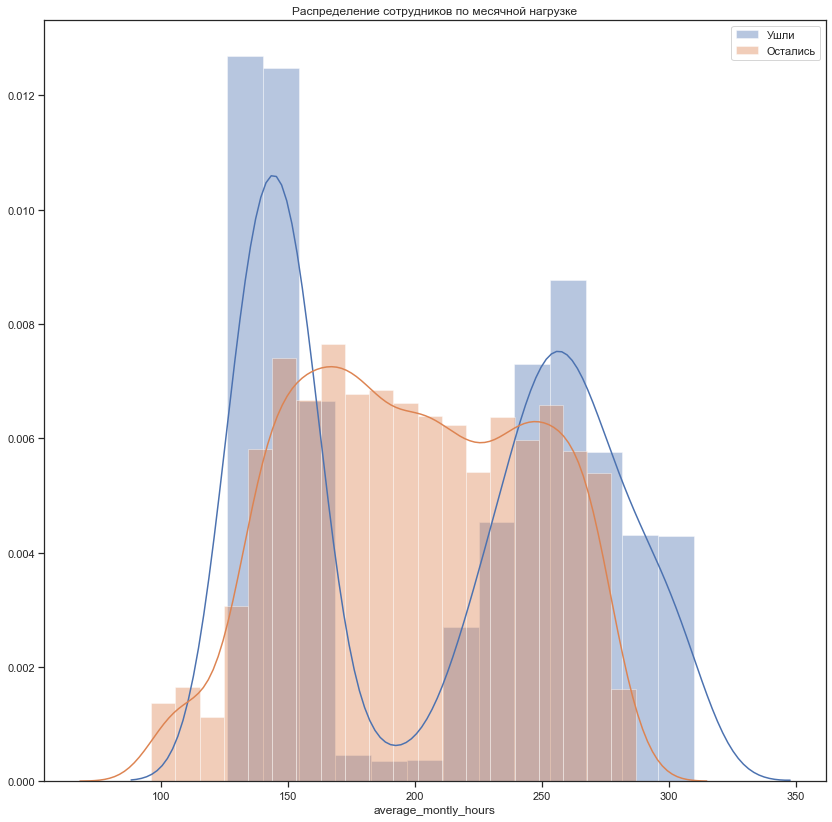

In [118]:
sns.distplot(left)
sns.distplot(stayed)
plt.title('Распределение сотрудников по месячной нагрузке')
plt.legend(['Ушли', 'Остались'])
plt.show()

**Распределения разные, на что указывает t-тест, Манн-Уитни уловил, что есть общая тенденция к снижению числа сотрудников с высокой нагрузкой  
(в сравнении с низкой). Есть провал в районе 200 среднемесячных часов, возможно ушедшие с малым количеством часов и с большим количеством часов имели  
разные причины для увольнения, Выдвинем еще одну гипотезу**

**Ушедшие люди, имеющие нагрузку в пределе от 130 до 170 часов в месяц, получали такую же зарплату, чем оставшиеся с такой же нагрузкой**

In [122]:
left = data[(data['left'] == 1) & (data['average_montly_hours'] < 170) & (data['average_montly_hours'] > 130)]['salary_for_count']
stayed = data[(data['left'] == 0) & (data['average_montly_hours'] < 170) & (data['average_montly_hours'] > 130)]['salary_for_count']

In [123]:
len(left), len(stayed)

(1406, 2921)

In [124]:
stayed = stayed.sample(1406)

In [125]:
stats.mannwhitneyu(left, stayed, alternative = 'less')

MannwhitneyuResult(statistic=799709.5, pvalue=1.39127105753564e-23)

In [126]:
stats.ttest_ind(left , stayed, equal_var = False)

Ttest_indResult(statistic=-10.444632681761146, pvalue=4.555143134946509e-25)

In [127]:
stats.mannwhitneyu(left, left, alternative = 'less')

MannwhitneyuResult(statistic=988418.0, pvalue=0.500010971927962)

In [130]:
left.mean(), stayed.mean(), (stayed.mean()-left.mean())/stayed.mean()*100

(0.4018492176386913, 0.635846372688478, 36.80089485458613)

**Можно сделать вывод, что люди ушедшие с работы и которые отрабатывали около 150 часов в неделю получали меньшую зарплату (на 37%), чем их оставшиеся коллеги.  
И это статистически значимо.  
Кстати, нагрузочка в этой компании та еще, некоторые по 16 часов в день имеют нагрузку, это какая-то азиатская компания?**

**На этом все. Спасибо за интересный кейс! Чтобы в нем разобраться досконально нужен наверное не один месяц работы  
и более крепкие, чем у меня базовые знания по статистике. Надеюсь в ходе дальнейшей учебы по программе DataScience я их получу**  
# Спасибо. До свидания!